## **Kelompok 5/PYTN-KS-018**
### **Nama:**
1.   Nabila Putri Damayanti/PYTN-KS18-021
2.   Difa Fisabilillah/PYTN-KS18-017

### **Batch: 5**

## **1. Perkenalan**

### 1.1 Latar Belakang
Penyakit Cardiovascular (CVD) merupakan penyebab kematian nomor 1 di dunia. Sekitar 17,9 juta jiwa atau 31% kematian disebabkan oleh CVD. Gagal jantung merupakan kejadian yang umum disebabkan oleh penyakit kardiovaskular. Mayoritas penyakit kardiovaskular dapat dicegah dengan mengatasi faktor-faktor penyebab, seperti rokok, pola makan yang tidak sehat, aktivitas fisik yang kurang, dan konsumsi alkohol.

Prediksi gagal jantung perlu dilakukan untuk menghindari risiko yang lebih parah. Dalam prediksi ini, penggunaan *machine learning*, seperti Random Forest (RF), Extra Trees Classifier (EXT), dan Gradient Boosting (GBC) menjadi pilihan yang baik.

Algoritma RF, EXT, dan GBC telah terbukti efektif dalam mengidentifikasi pola non-linear dan mengatasi overfitting. Random forest bekerja dengan menggabungkan prediksi dari banyak pohon keputusan, sedangkan gradient boosting bekerja dengan memperbaiki kesalahan dari iterasi sebelumnya dengan membangun model baru.


### 1.2 Data dan Sumber Data
Data ini berasal dari *Kaggle Repository* [Heart Failure Prediction](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/data) yang memiliki 12 fitur untuk memprediksi kematian akibat gagal jantung dengan kolom **DEATH_EVENT** merupakan target variabel yang akan diprediksi.

Informasi Fitur:
1. DEATH_EVENT: kolom target
2. Age: umur pasien
3. Anaemia: Penurunan sel darah merah atau hemoglobin
4. Creatinine_phosph: Kadar enzim CPK dalam darah (mcg/L)
5. Diabetes: Pasien menderita penyakit diabetes atau tidak
6. Ejection_fraction: Persentase darah yang meninggalkan jantung pada setiap kontraksi
7. Gigh_blood_press: Pasien menderita hipertensi atau tidak
8. Platelets: Trombosit dalam darah (kiloplatelet/mL)
9. Serum_sodium: Kadar kreatinin serum dalam dara (mEq/L)
10. Sex: Gender
11. Smoking: Pasien merokok atau tidak
12. Time: Periode tindak lanjut (hari)

### 1.3 Kasus:
Project ini dibuat untuk memprediksi gagal jantung menggunakan model RF dan GBC yang selanjutnya akan dianalisis model mana yang memiliki performa terbaik untuk melakukan prediksi. Selain itu, project ini dibuat untuk mengetahui fitur-fitur yang berpengaruh pada prediksi gagal jantung.

## **2. Install dan Import Library**

In [1]:
# Install package yang digunakan untuk melakukan oversampling

In [2]:
pip install smote-variants

In [3]:
# Import library dataframe
import pandas as pd
import numpy as np
from numpy import mean

# Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

# Import library untuk oversampling
import smote_variants as sv

# Import library untuk modelling
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier, StackingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier


# Import library untuk improvement
from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.datasets import make_classification

# Import library untuk mengabaikan peringatan
import warnings
warnings.filterwarnings("ignore")

## **3. Data Loading**
Data Loading merupakan proses memuat dataset dari file sumber ke database.

### 3.1 Import Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# data = pd.read_csv("/content/drive/MyDrive/Colab/heart_failure_clinical_records_dataset.csv")

In [6]:
cd './drive/MyDrive/Hacktiv8/FINAL PROJECT/FP3/'

/content/drive/MyDrive/Hacktiv8/FINAL PROJECT/FP3


In [7]:
data = pd.read_csv("./heart_failure_clinical_records_dataset.csv")

In [8]:
data.head() # Preview 5 data gagal ginjal teratas

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### 3.2 Melihat ukuran data

In [9]:
data.shape # Untuk melihat ukuran data

(299, 13)

Disini dapat dilihat bahwa ukuran data terdiri dari 299 baris dan 13 kolom.


### 3.3 Melihat data type setiap feature

In [10]:
data.info() # Cek data type tiap feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB




Dan data type yang dimiliki pada dataset ini terdiri atas 2 tipe yaitu tipe integer dan float, Sehingga dapat disimpulkan bahwa semua kolom pada dataset ini bertipe numerik. Kolom Death_event akan menjadi kolom target yang terdiri dari 0 dan 1, dimana 0 bearti 'Tidak' dan 1 bearti 'Ya'

## **4. Data Cleaning**
Data cleaning merupakan proses menyiapkan data dengan menghapus atau memodifikasi data yang tidak relevan atau tidak akurat. Pada data cleaning ini akan dilakukan pengisian missing value menggunakan media untuk tipe data int dan float serta menggunakan modus untuk tipe data object.

### 4.1 Memeriksa missing value

In [11]:
data.isnull().sum() # List Nan value

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

**Note:**
Dataset tidak memiliki missing value.

### 4.2 Memeriksa korelasi antar kolom
Pemeriksaan berguna untuk feature selection / memilih feature(kolom) yang tepat untuk meningkatkan kinerja model dengan mengurangi kompleksitas dan overfitting.

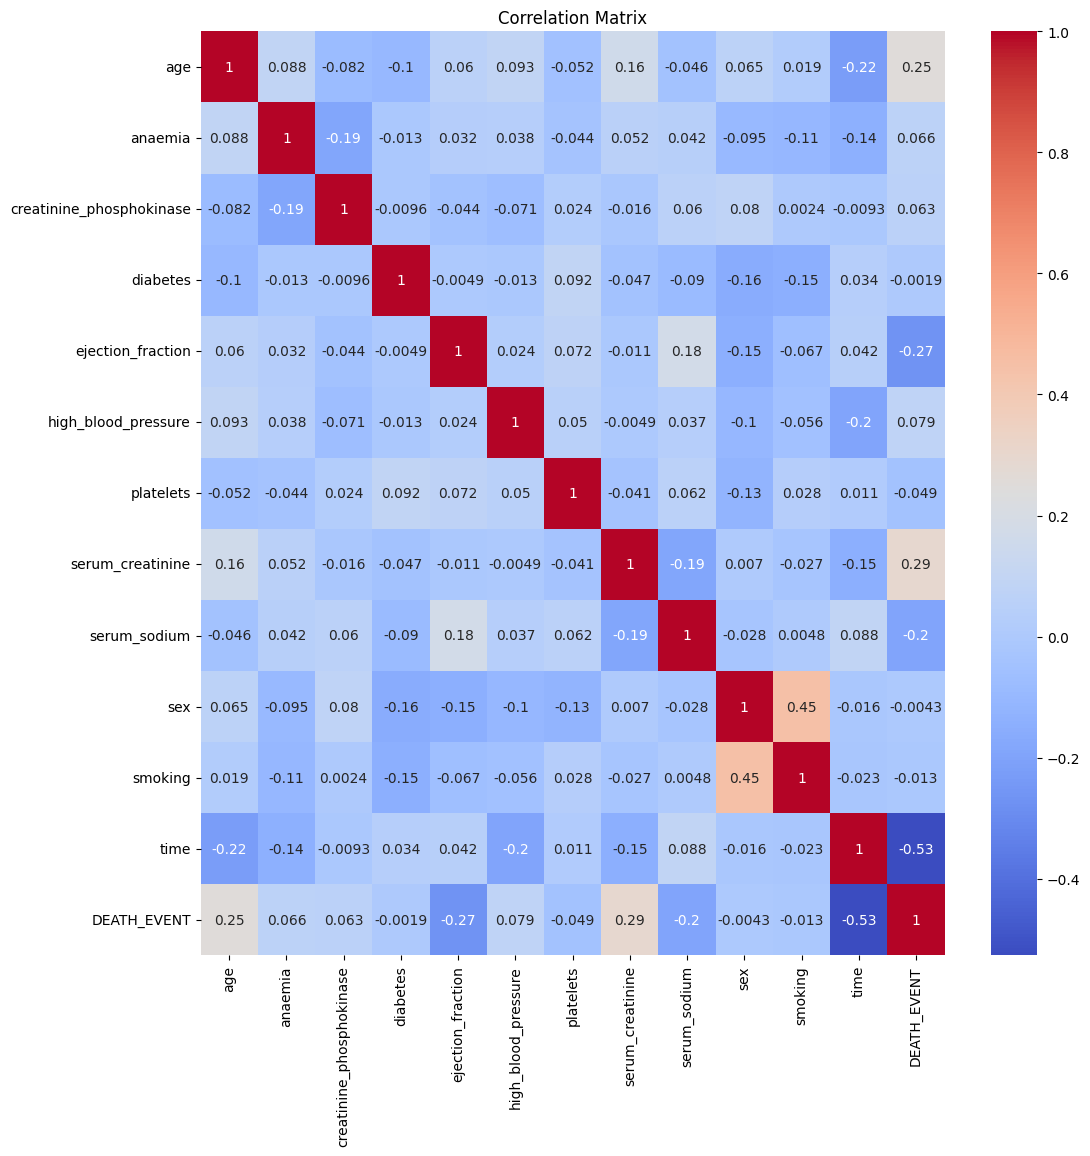

In [12]:
# Visualisasi korelasi antar kolom
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Memeriksa korelasi antar kolom
correlation = data.corr()
correlation

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [14]:
target=correlation['DEATH_EVENT']
target

age                         0.253729
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
ejection_fraction          -0.268603
high_blood_pressure         0.079351
platelets                  -0.049139
serum_creatinine            0.294278
serum_sodium               -0.195204
sex                        -0.004316
smoking                    -0.012623
time                       -0.526964
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

Dapat dilihat bahwa korelasi terhadap kolom target disini terdapat 2 macam yaitu hubungan linier positif dan hubungan linier negatif dan kolom serum_creatinine memiliki korelasi yang paling besar terhadap kolom target, kemudian diikuti oleh kolom age/umur

### 4.4 Tambah Kolom Baru
Menambahkan kolom baru yang dapat digunakan sebagai fitur tambahan dalam memprediksi DEATH_EVENT.

In [15]:
# Definisikan fungsi untuk menghitung potensi pemulihan
def calculate_recovery_potential(data):
    # Hitung kolom yang dapat mengukur tingkat keparahan penyakit
    severity = data['creatinine_phosphokinase'] / data['platelets']
    severity += data['serum_creatinine'] / data['serum_sodium']
    severity += data['age'] / data['ejection_fraction']

    # Hitung kolom yang dapat mengukur potensi pemulihan
    recovery_potential = 1 / severity

    return recovery_potential

# Buat DataFrame
data = pd.DataFrame(data)

# Hitung kolom baru
data['recovery_potential'] = calculate_recovery_potential(data)

# Tampilkan DataFrame dalam format tabel
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,recovery_potential
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,0.265477
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,0.673262
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,0.306656
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0.397710
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,0.305459


### 4.5 Mengubah tipe data pada kolom age
Memeriksa penyebab kolom age bertipe data float.

In [16]:
array = np.array(data['age'])
print(array)

[75.    55.    65.    50.    65.    90.    75.    60.    65.    80.
 75.    62.    45.    50.    49.    82.    87.    45.    70.    48.
 65.    65.    68.    53.    75.    80.    95.    70.    58.    82.
 94.    85.    50.    50.    65.    69.    90.    82.    60.    60.
 70.    50.    70.    72.    60.    50.    51.    60.    80.    57.
 68.    53.    60.    70.    60.    95.    70.    60.    49.    72.
 45.    50.    55.    45.    45.    60.    42.    72.    70.    65.
 41.    58.    85.    65.    69.    60.    70.    42.    75.    55.
 70.    67.    60.    79.    59.    51.    55.    65.    44.    57.
 70.    60.    42.    60.    58.    58.    63.    70.    60.    63.
 65.    75.    80.    42.    60.    72.    55.    45.    63.    45.
 85.    55.    50.    70.    60.    58.    60.    85.    65.    86.
 60.    66.    60.    60.    60.    43.    46.    58.    61.    53.
 53.    60.    46.    63.    81.    75.    65.    68.    62.    50.
 80.    46.    50.    61.    72.    50.    52.  

**Note:**
Terlihat bahwa terdapat dua data pada kolom age yang bertipe data float (60.667). Oleh karena itu, tipe data dikonversi menjadi int.

In [17]:
data['age'] = np.around(array).astype('int64')

In [18]:
array = np.array(data['age'])
print(array)

[75 55 65 50 65 90 75 60 65 80 75 62 45 50 49 82 87 45 70 48 65 65 68 53
 75 80 95 70 58 82 94 85 50 50 65 69 90 82 60 60 70 50 70 72 60 50 51 60
 80 57 68 53 60 70 60 95 70 60 49 72 45 50 55 45 45 60 42 72 70 65 41 58
 85 65 69 60 70 42 75 55 70 67 60 79 59 51 55 65 44 57 70 60 42 60 58 58
 63 70 60 63 65 75 80 42 60 72 55 45 63 45 85 55 50 70 60 58 60 85 65 86
 60 66 60 60 60 43 46 58 61 53 53 60 46 63 81 75 65 68 62 50 80 46 50 61
 72 50 52 64 75 60 72 62 50 50 65 60 52 50 85 59 66 45 63 50 45 80 53 59
 65 70 51 52 70 50 65 60 69 49 63 55 40 59 65 75 58 61 50 60 61 40 80 64
 50 73 45 77 45 65 50 60 63 45 70 60 78 50 40 85 60 49 70 50 78 48 65 73
 70 54 68 55 73 65 42 47 58 75 58 55 65 72 60 70 40 53 53 77 75 70 65 55
 70 65 40 73 54 61 55 64 40 53 50 55 50 70 53 52 65 58 45 53 55 62 65 68
 61 50 55 56 45 40 44 51 67 42 60 45 70 70 50 55 70 70 42 65 50 55 60 45
 65 90 45 60 52 63 62 55 45 45 50]


Sekarang tipe data umur telah sesuai

### 4.6 Memeriksa data duplicate
Hal ini karena data duplikat berpengaruh terhadap model prediksi, konsistensi data, dan penting untuk statistik deksriptif.

In [19]:
data.duplicated().sum()

0

**Note:**
Pada data tidak ditemukan data duplikat.

## **5. Eksplore Data**
Exploratory data Analysis (EDA) merupakan metode explore data dengan menggunakan teknik aritmatika sederhana dan teknik grafis untuk melihat isi dataset. Explore data ini akan dilakukan menggunakan query, grouping, visualisasi sederhana, dan lainnya.

### 5.1 Bagaimana distribusi kolom DEATH_EVENT?
Pengecekan ini dilakukan untuk menentukan tahap apa yang harus dilakukan selanjutnya.

In [20]:
# Menghitung total dari setiap data unik pada kolom RainTomorrow
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

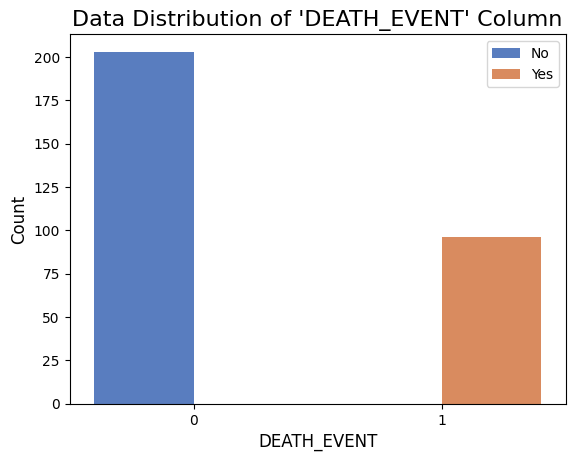

<Figure size 1000x800 with 0 Axes>

In [21]:
sns.countplot(x=data['DEATH_EVENT'], hue='DEATH_EVENT', palette="muted", data=data) # Visualisasi kategori Yes dan No pada kolom RainTomorrow
plt.title("Data Distribution of 'DEATH_EVENT' Column", size=16) # Menambahkan judul
plt.xlabel('DEATH_EVENT', size=12) # Menambahkan x label
plt.ylabel('Count', size=12) # Menambahkan y label
plt.legend(['No', 'Yes'], loc='upper right') # Memberikan legend
plt.figure(figsize=(10, 8)) # Custom ukuran grafik
sns.set_palette(sns.color_palette('Blues', 2)) # Custom color
plt.show() # Menampilakan grafik

**Note:**
Pada kolom DEATH_EVENT dataset memiliki data dengan prediksi 'yes' lebih banyak dibandingkan prediksi 'no'. Oleh karena itu, nantinya akan dilakukan oversampling untuk mengatasi ketimpangan data.

### 5.2 Berdasarkan gender bagaimana persentase pasien bertahan hidup?

In [22]:
male = data[data["sex"]==1]
female = data[data["sex"]==0]

male_survived = male[data["DEATH_EVENT"]==0]
male_not = male[data["DEATH_EVENT"]==1]
female_survived = female[data["DEATH_EVENT"]==0]
female_not = female[data["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male_survived),len(male_not),
         len(female_survived),len(female_not)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="Analysis on Survival based on Gender", )
fig.show()

**Note:**
*   Persentase tertinggi pasien mampu bertahan hidup adalah laki-laki.
*   Persentase terendah pasien tidak mampu berthaan hidup adalah perempuan.



### 5.3 Melihat distribusi data categorical
Hal ini dilakukan untuk mengidentifikasi distribusi dan validasi data.

In [23]:
categorical = ['anaemia','diabetes','high_blood_pressure','sex','smoking']

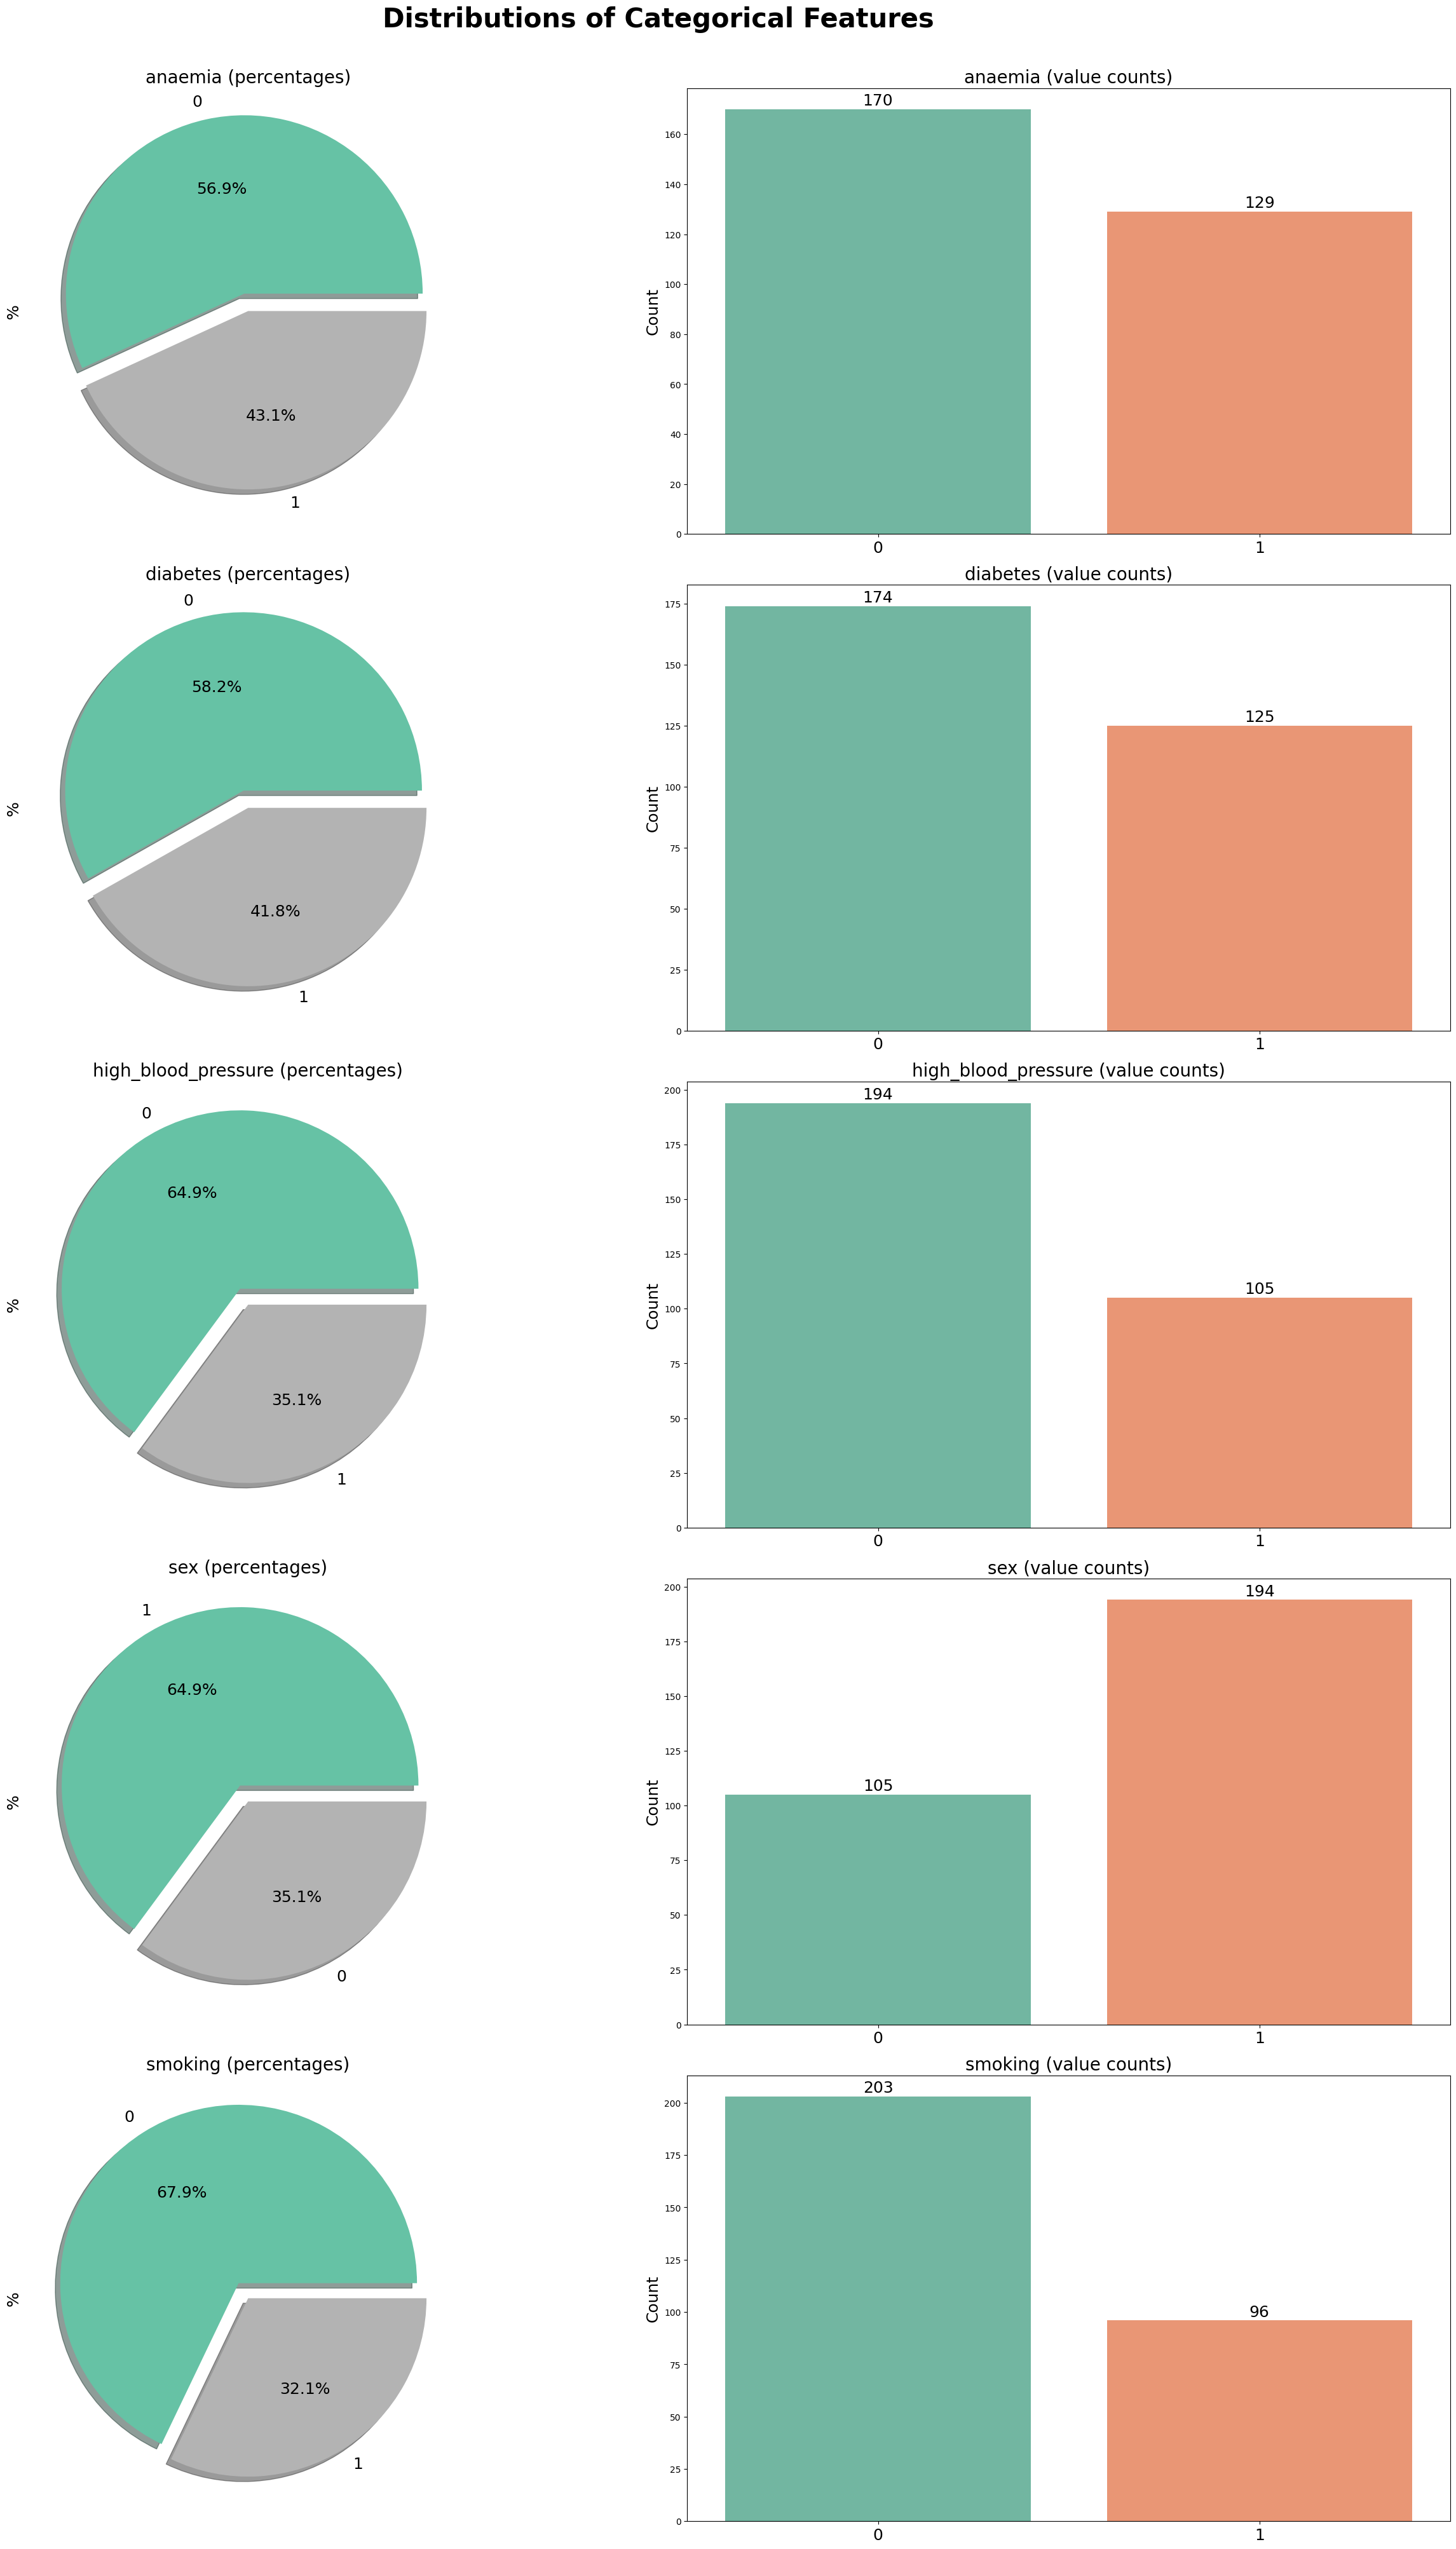

In [24]:
# Visualisasi distribusi data pada kolom bertipe data categorical
figure, axes = plt.subplots(5, 2, figsize=(25, 40), constrained_layout=True)
figure.suptitle('Distributions of Categorical Features\n', fontsize=30, fontweight='bold') # Menambahkan judul plot

for i in range(len(categorical)):
    column=categorical[i]
    graph1=data[column].value_counts().plot.pie(autopct='%1.1f%%',
                                                    ax=axes[i,0],
                                                    colormap="Set2",
                                                    fontsize=18,
                                                    shadow=True,
                                                    explode=[0.1,0])
    axes[i,0].set_ylabel('%',fontsize=18)
    axes[i,0].set_title(column+' (percentages)', fontsize=20)
    graph2=sns.countplot(x=column,
                         data=data,
                         palette='Set2',
                         ax=axes[i,1])
    axes[i,1].set_xlabel(None)
    axes[i,1].set_ylabel('Count',fontsize=18) # Menambahkan y label
    axes[i,1].set_xticklabels(axes[i,1].get_xticklabels(), fontsize=18)
    axes[i,1].set_title(column +' (value counts)', fontsize=20)
    for c in graph2.containers:
        graph2.bar_label(c, fmt='%.0f', label_type='edge', padding=1, fontsize=18)

**Note:**
*   Sebagian pasien gagal jantung juga menderita anemia, diabetes, atau darah tinggi.
*   Pasien gagal jantung laki-laki lebih banyak dibandingkan perempuan.
*   Pasien gagal jantung yang tidak merokok lebih banyak dibandingkan yang merokok.


### 5.4 Melihat distribusi data

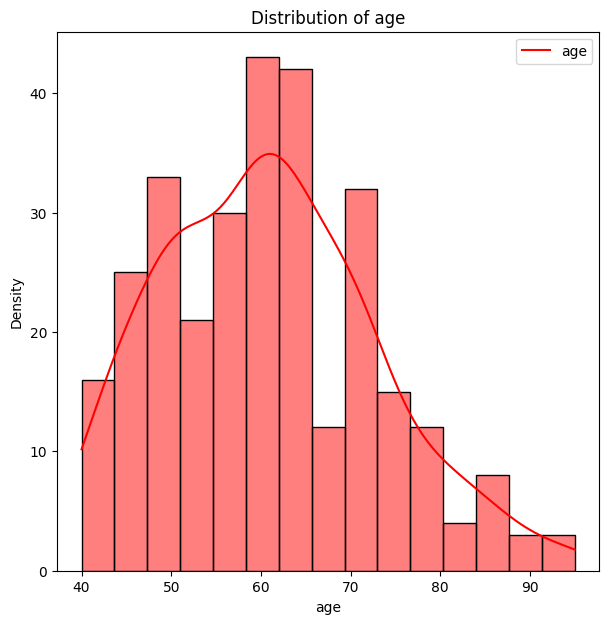

<Figure size 1000x800 with 0 Axes>

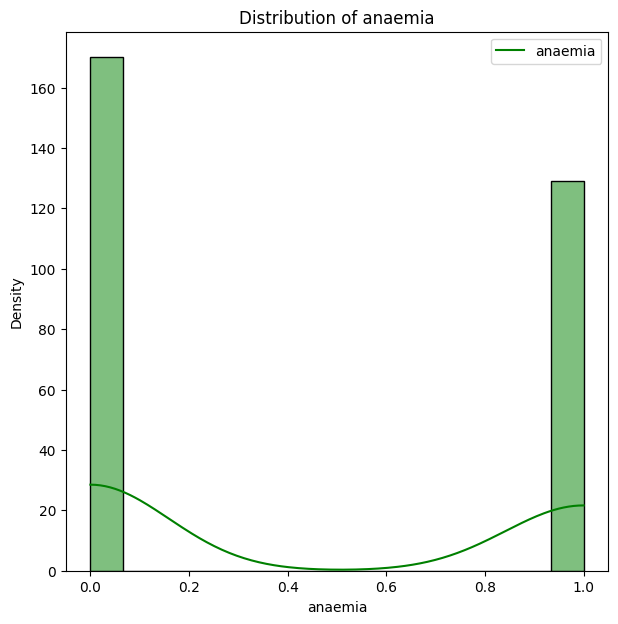

<Figure size 1000x800 with 0 Axes>

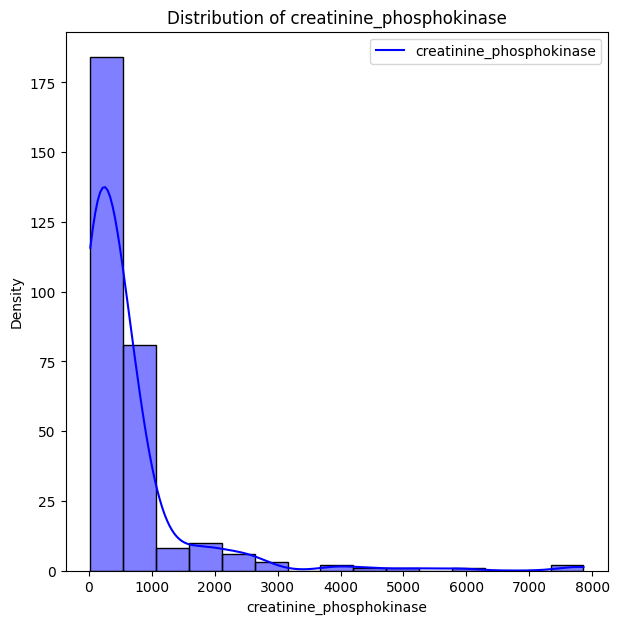

<Figure size 1000x800 with 0 Axes>

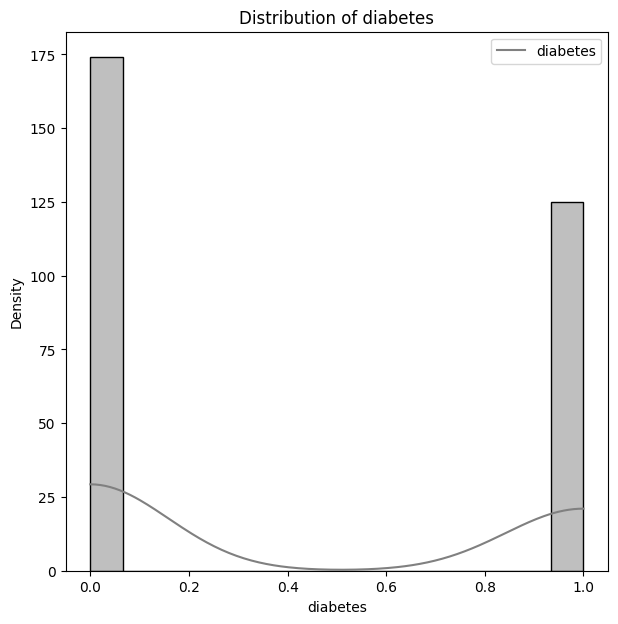

<Figure size 1000x800 with 0 Axes>

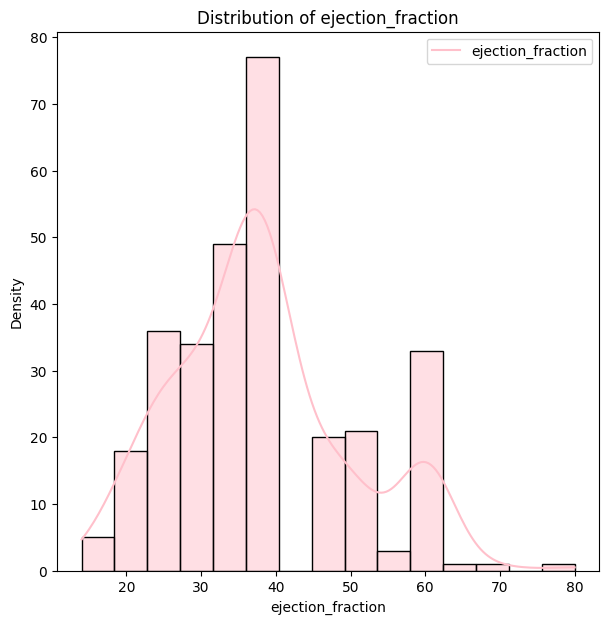

<Figure size 1000x800 with 0 Axes>

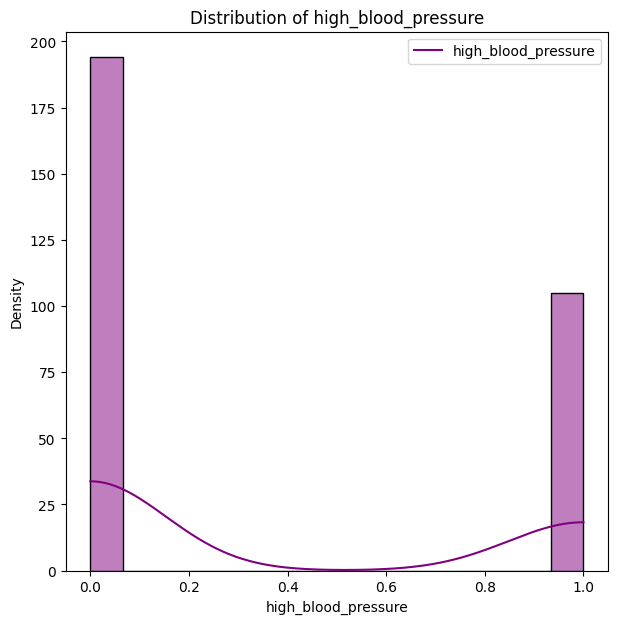

<Figure size 1000x800 with 0 Axes>

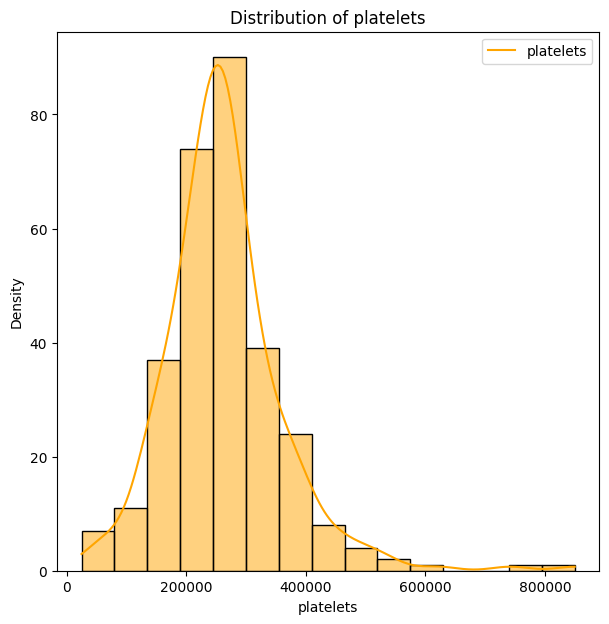

<Figure size 1000x800 with 0 Axes>

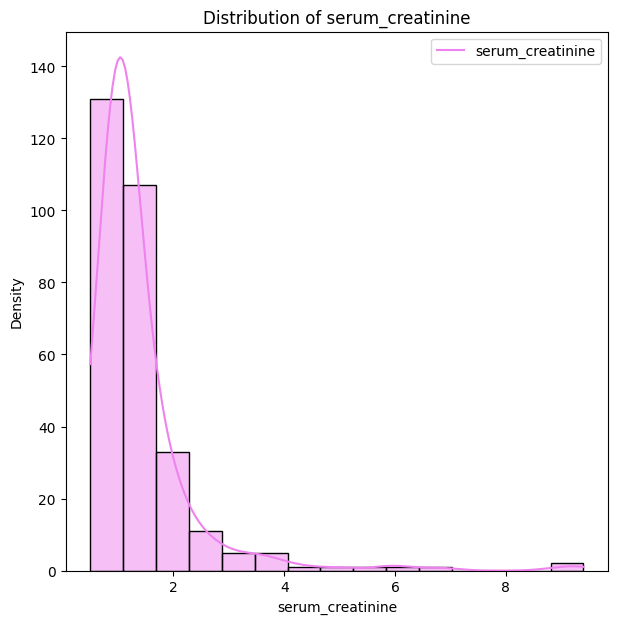

<Figure size 1000x800 with 0 Axes>

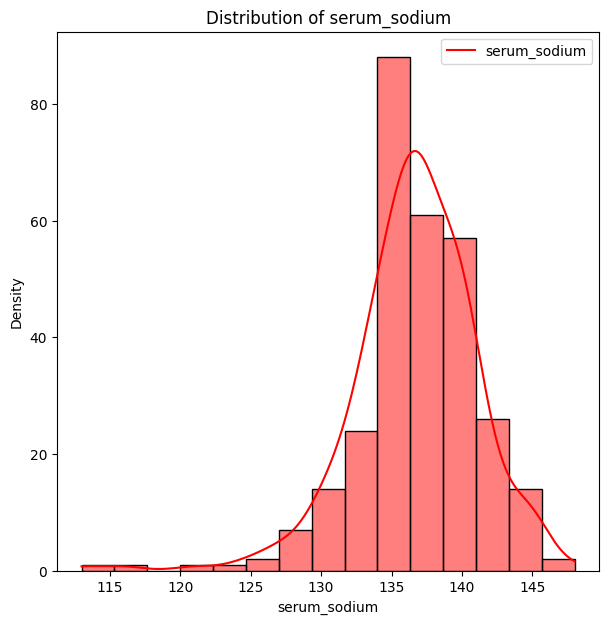

<Figure size 1000x800 with 0 Axes>

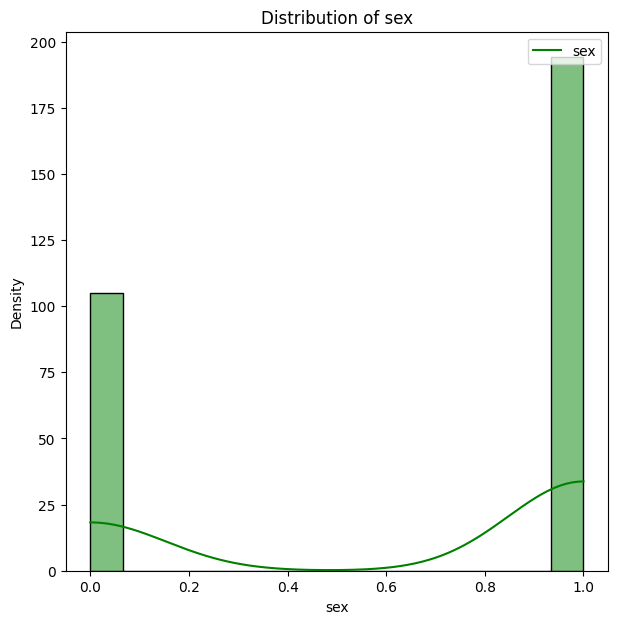

<Figure size 1000x800 with 0 Axes>

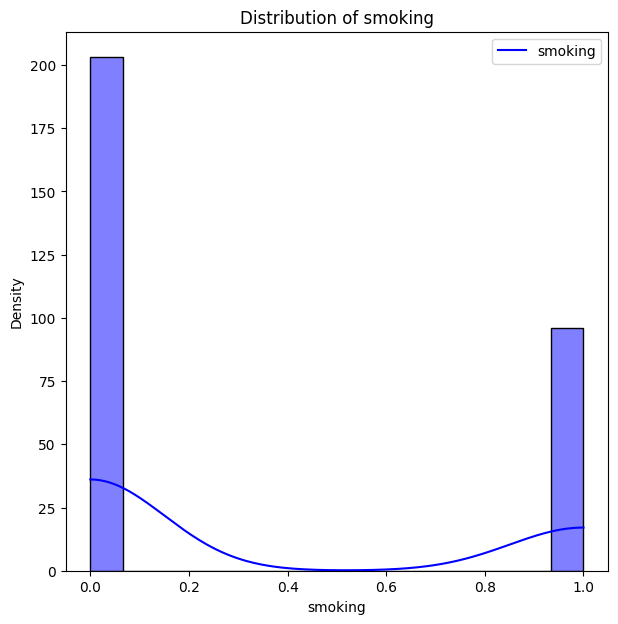

<Figure size 1000x800 with 0 Axes>

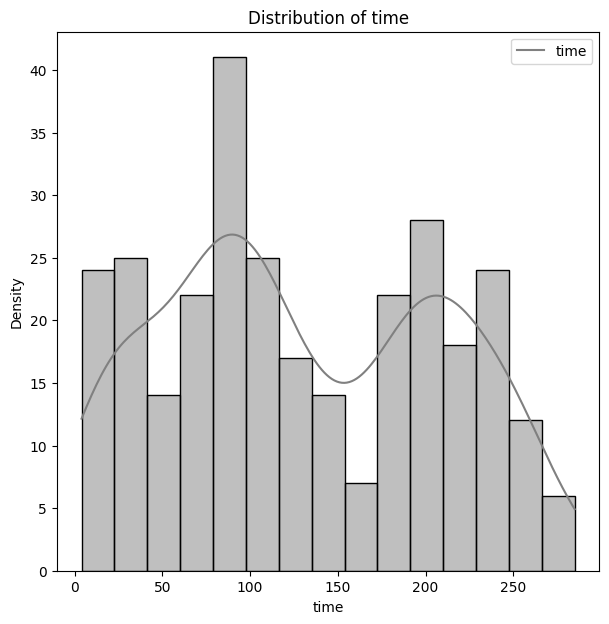

<Figure size 1000x800 with 0 Axes>

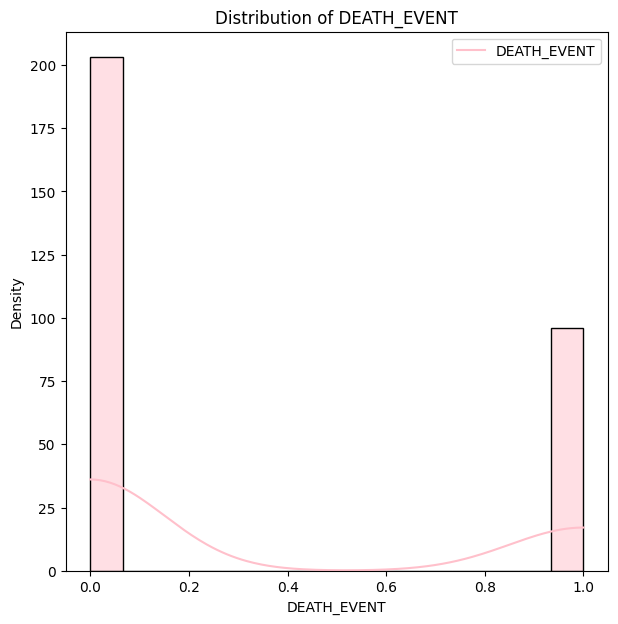

<Figure size 1000x800 with 0 Axes>

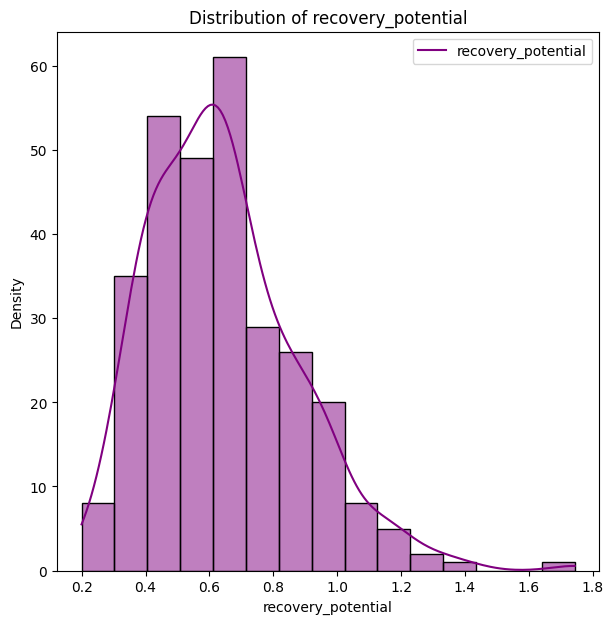

<Figure size 1000x800 with 0 Axes>

In [25]:
# Visualisasi distribusi data pada kolom bertipe data numerik
colors_list=["red", "green", "blue", "grey","pink", "purple", "orange", "violet", "red", "green", "blue", "grey", "pink", "purple"]
for i in range(len(data.columns)):
    plt.figure(figsize=(7,7))
    sns.histplot(data[data.columns[i]], color=colors_list[i], kde=True, bins=15)
    label=data.columns[i]
    plt.xlabel(data.columns[i]) # Menambahkan x label
    plt.ylabel("Density") # Menambahkan y label

    # Title
    plt.title(f'Distribution of {data.columns[i]}', size=12) # Menambahkan judul plot

    # Legend
    plt.legend([f'{data.columns[i]}'], loc='upper right') # Menambahkan legenda

    # Custom size
    plt.figure(figsize=(10, 8))

    # Custom color
    sns.set_palette(sns.color_palette('Blues', 2))

    plt.show()

### 5.5 Bagaimana perbandingan waktu untuk follow-up dengan kematian pasien?

In [26]:
fig = px.histogram(data, x="time", color="DEATH_EVENT", marginal="box", hover_data=data.columns)
fig.show()

Nilai record kematian yang tercatat dengan waktu perwatan paling lama adalah 241 hari dengan 1 kematian. Nilai minimum perawatan pada data ini adalah 4 hari dengan 1 record kematian.

Catatan Sembuh pasien paling cepat pada data ini adalah 12 hari perawatan. Dan perawatan paling lama adalah 285 hari dengan 2 record pasien sembuh.

### 5.6 Bagaimana persebaran jumlah kematian pasien berdasarkan usia?

Text(0.5, 1.0, 'Persebaran Jumlah Kematian Pasien Berdasarkan Usia')

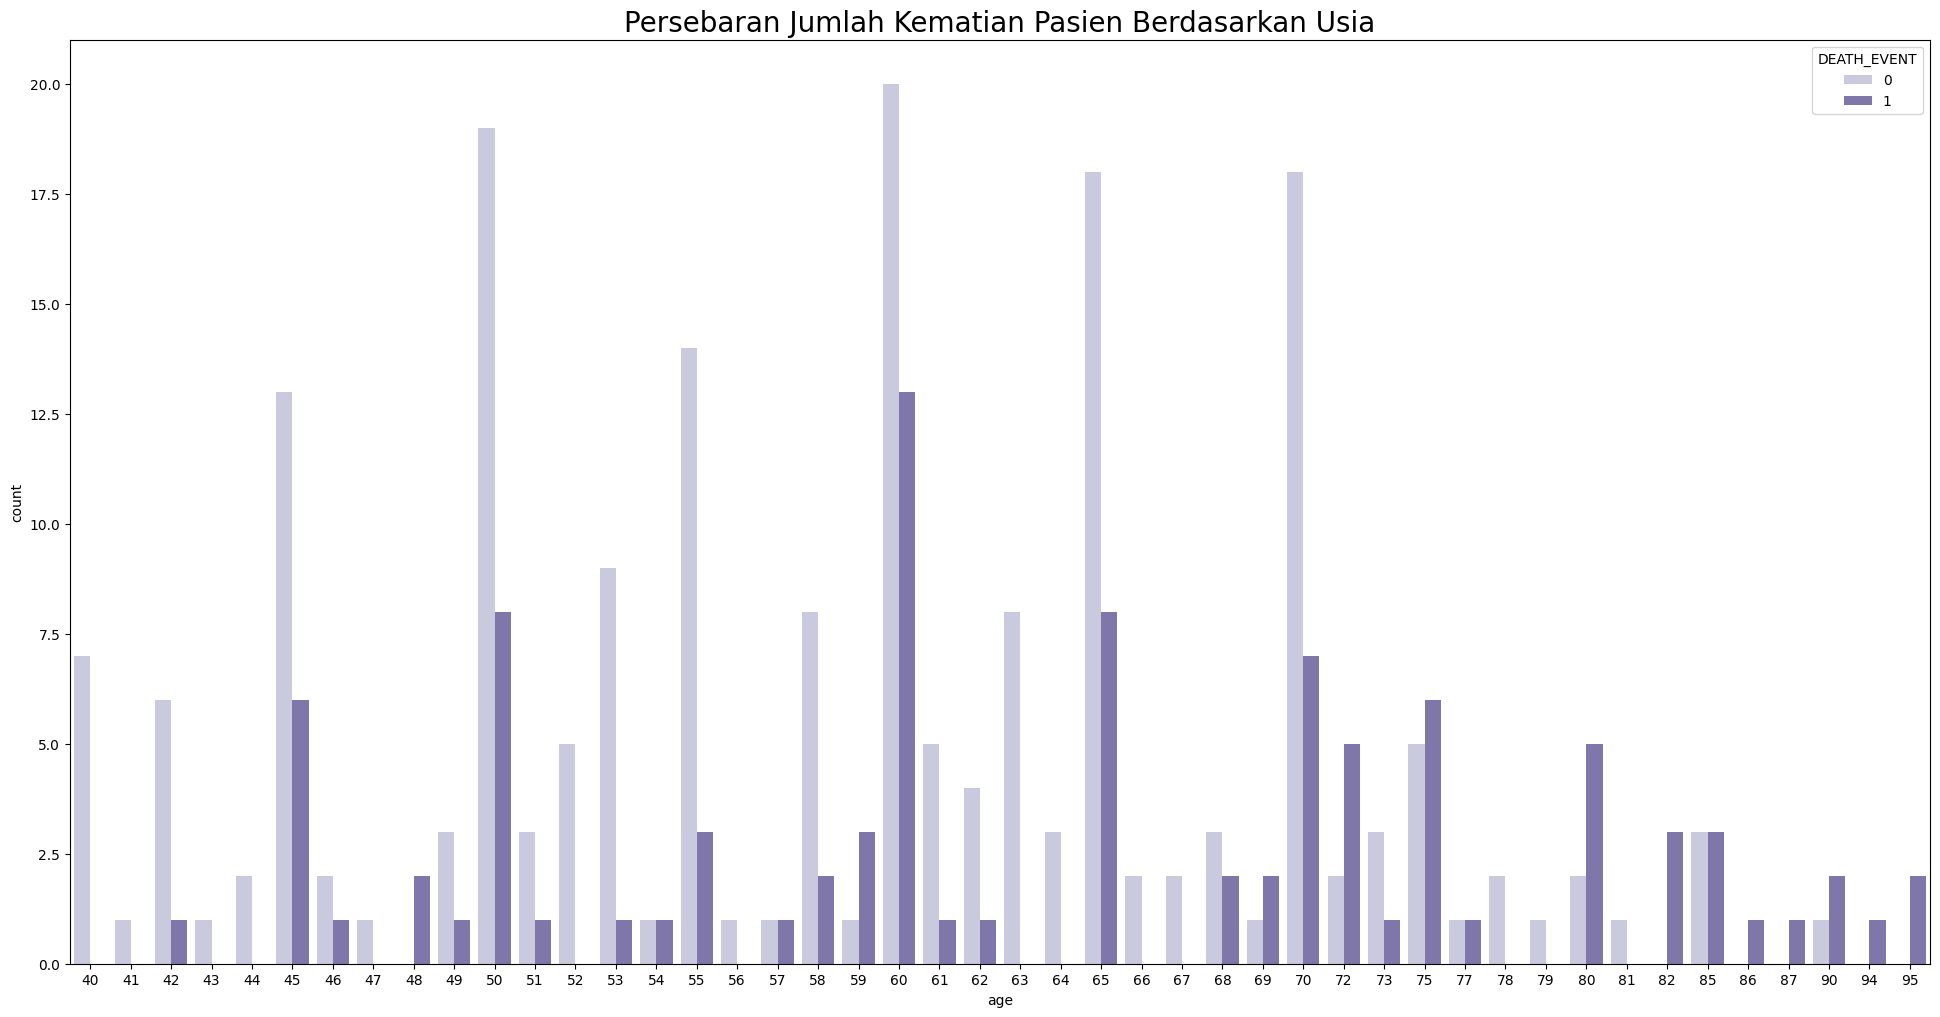

In [27]:
plt.figure(figsize=(24,12))
ax = sns.countplot(x="age", hue="DEATH_EVENT", data=data, palette='Purples')
plt.title('Persebaran Jumlah Kematian Pasien Berdasarkan Usia', fontsize=20)

Berdasarkan chart di atas, dapat dilihat bahwa usia 60 tahun merupakan persebaran kematian tertinggi.

### 5.6 Central Tendency dan Measures of Spread
**Note:**
1. Central tendency menunjukkan titik tengah dari suatu dataset untuk mengetahui posisi banyak nilai data berkumpul. Central tendency yang sering digunakan adalah mean, median, dan modus.
2. Measures of Spread merupakan pendeskripsian data untuk melihat distribusi data. Measures of spread yang sering digunakan adalah range, variance, dan standard deviasi.

In [28]:
data_central = data.loc[:,['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time', 'recovery_potential']]
data_central.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,recovery_potential
0,75,582,20,265000.00,1.9,130,4,0.265477
1,55,7861,38,263358.03,1.1,136,6,0.673262
2,65,146,20,162000.00,1.3,129,7,0.306656
3,50,111,20,210000.00,1.9,137,7,0.397710
4,65,160,20,327000.00,2.7,116,8,0.305459


kolom pada data_central disini adalah data yang sifatnya continue dan dapat dicari nilai central tendency dan measures of spreadnya

In [29]:
for column in data_central:
    mean = data_central[column].mean()
    median = data_central[column].median()
    mode = data_central[column].mode()[0]
    min_value = data_central[column].min()
    max_value = data_central[column].max()
    range_value = max_value - min_value
    variance = data_central[column].var()
    std_dev = data_central[column].std()

# Print hasilnya
    print(f"Nama Kolom: {column}")
    print(f"Mean: {mean:.3f}")
    print(f"Median: {median:.3f}")
    print(f"Modus: {mode:.3f}")
    print(f"Range: {range_value:.3f}")
    print(f"Variansi: {variance:.3f}")
    print(f"Standard Deviasi: {std_dev:.3f}")
    print("  ")

Nama Kolom: age
Mean: 60.836
Median: 60.000
Modus: 60.000
Range: 55.000
Variansi: 141.486
Standard Deviasi: 11.895
  
Nama Kolom: creatinine_phosphokinase
Mean: 581.839
Median: 250.000
Modus: 582.000
Range: 7838.000
Variansi: 941458.571
Standard Deviasi: 970.288
  
Nama Kolom: ejection_fraction
Mean: 38.084
Median: 38.000
Modus: 35.000
Range: 66.000
Variansi: 140.063
Standard Deviasi: 11.835
  
Nama Kolom: platelets
Mean: 263358.029
Median: 262000.000
Modus: 263358.030
Range: 824900.000
Variansi: 9565668749.449
Standard Deviasi: 97804.237
  
Nama Kolom: serum_creatinine
Mean: 1.394
Median: 1.100
Modus: 1.000
Range: 8.900
Variansi: 1.070
Standard Deviasi: 1.035
  
Nama Kolom: serum_sodium
Mean: 136.625
Median: 137.000
Modus: 136.000
Range: 35.000
Variansi: 19.470
Standard Deviasi: 4.412
  
Nama Kolom: time
Mean: 130.261
Median: 115.000
Modus: 187.000
Range: 281.000
Variansi: 6023.965
Standard Deviasi: 77.614
  
Nama Kolom: recovery_potential
Mean: 0.642
Median: 0.618
Modus: 0.200
Range:

### 5.7 Cardinality
Cardinality/kardinalitas dilakukan untuk mengidentifikasi label atau data unik pada kolom tertentu dimana hal ini penting untuk memastikan model konsisten dan overfitting.

In [30]:
for feature in data.columns:
  unique_value = len(data[feature].unique())
  print(f'Cardinality of {format(feature)} : {unique_value}')

Cardinality of age : 46
Cardinality of anaemia : 2
Cardinality of creatinine_phosphokinase : 208
Cardinality of diabetes : 2
Cardinality of ejection_fraction : 17
Cardinality of high_blood_pressure : 2
Cardinality of platelets : 176
Cardinality of serum_creatinine : 40
Cardinality of serum_sodium : 27
Cardinality of sex : 2
Cardinality of smoking : 2
Cardinality of time : 148
Cardinality of DEATH_EVENT : 2
Cardinality of recovery_potential : 299


Kardinalitas kolom yang dicari disini adalah kardinalitas dari semua kolom, sehingga diketahui kolom mana yang memiliki kardinalitas yang tinggi. Tetapi pengecekan kardinalitas disini lebih cocok ke dataset yang memiliki fitur kategorik, karena jika kolom kategorik  tersebut memiliki  banyak kardinalitas didalamnya dimensi yang dibuatpun akan sangat banyak ketika dikodekan kedalam numerik dan akan menimbulkan masalah dalam model. Tetapi pada dataset ini diketahui bahwa semua nilai yang dimiliki tiap kolom adalah bertipe numerik karena nilai pada kolom kategorikalnya pun sudah dalam bentuk biner, sehingga kardinalitas yang tinggipun tidak akan menjadi masalah, malah dapat dikatakan sangat wajar jika memiliki kardinalitas yang tinggi karena data tersebut memang data yang kontinu.

## **6. Preprocessing Data**
Preprocessing data dilakukan untuk mengatasi permasalahan yang dapat mengganggu pemodelan, contohnya format yang tidak konsisten.

### 6.1 Outliers

In [31]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,recovery_potential
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000,299.000000
mean,60.836120,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107,0.642153
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767,0.232433
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000,0.199573
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000,0.471878
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000,0.618149
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000,0.766824
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000,1.744217


In [32]:
# Mencari tahu data yang memiliki outliers dengan mendefinisikan fungsi
continous_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium', 'time', 'recovery_potential']
def outliers(data_out, drop = False):
    for each_feature in data_out.columns:
        feature_data = data_out[each_feature]
        Q1 = np.percentile(feature_data, 25.)
        Q3 = np.percentile(feature_data, 75.)
        IQR = Q3-Q1
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        print('Pada kolom {}, jumlah outlier adalah {}'.format(each_feature, len(outliers)))

In [33]:
outliers(data[continous_features])

Pada kolom age, jumlah outlier adalah 0
Pada kolom creatinine_phosphokinase, jumlah outlier adalah 29
Pada kolom ejection_fraction, jumlah outlier adalah 2
Pada kolom platelets, jumlah outlier adalah 21
Pada kolom serum_creatinine, jumlah outlier adalah 29
Pada kolom serum_sodium, jumlah outlier adalah 4
Pada kolom time, jumlah outlier adalah 0
Pada kolom recovery_potential, jumlah outlier adalah 7


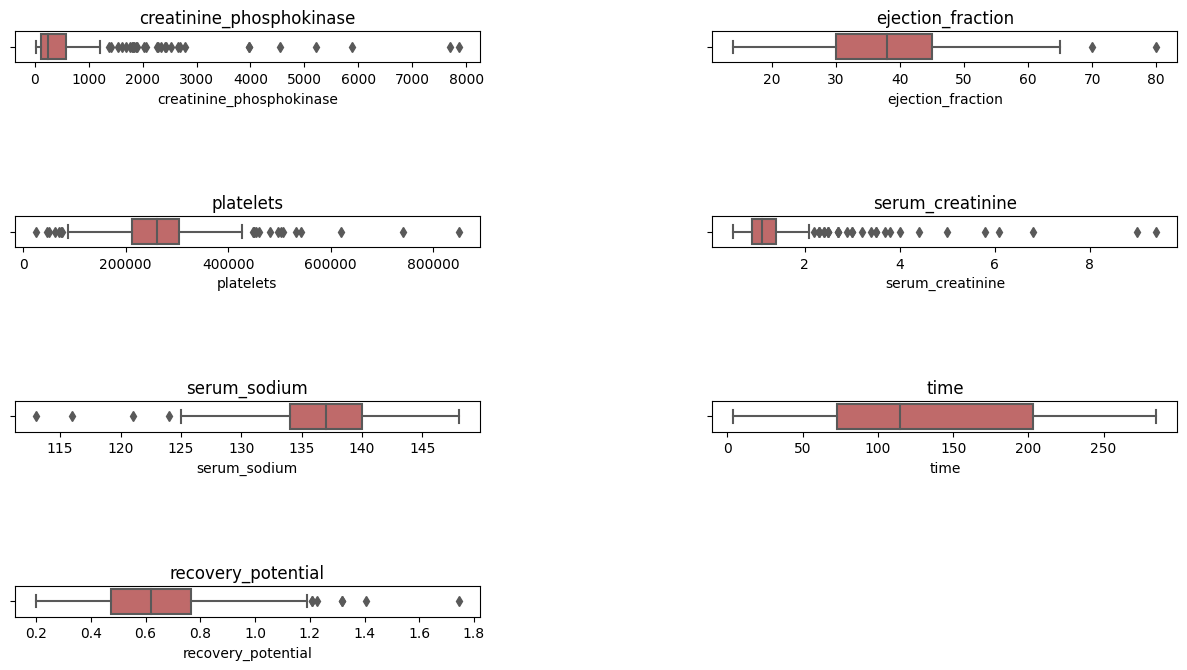

In [34]:
cols = data.loc[:,['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time', 'recovery_potential']]

plt.figure(figsize=(15,10))

for i, col in enumerate(cols):
    plt.subplot(5, 2, i+1)
    plt.subplots_adjust(hspace =5, wspace=.5)
    plt.title(col) # Menambahkan judul plot
    sns.boxplot(x = data[col], color = 'indianred')

**Note:**
Disini kelompok kami memutuskan untuk tetap mempertahankan outliers, karena data outliers pada kolom yang ada, mungkin memang bisa terjadi
Ada beberapa alasan yang membuat kelompok kami memutuskan hal ini, yang pertama hanya menghapus outliers pada kolom ejection_fraction saja, alasan:

* Pada literatur yang kami dapatkan pada website [heart.org](https://heart.org). Disebutkan bahwa :
  1. Normal, jika 50-70% darah dipompa keluar setiap kontraksi.
  2. Dianggap terlalu rendah, jika 41-49% darah dipompa keluar, yang bearti jantung memompa sedikit dari setengah volume darah.
  3. Gagal jantung atau cardiomyopathy, jika <= 40% darah dipompa keluar setiap kontraksi.
  4. Hypertrophic cardiomyopathy, jika Pengukuran fraksi ejeksi yang lebih tinggi dari 75%. [[ literatur 1 ]](https://www.heart.org/en/health-topics/heart-failure/diagnosing-heart-failure/ejection-fraction-heart-failure-measurement)

* Outliers pada kolom creatinine_phosphokinase tetap dipertahankan karena:
  dari literatur yang didapat pada [mountsinai.org](https://www.mountsinai.org/) dikatakan bahwa nilai CPK (creatinine_phosphokinase) dikatakan normal biasanya antara  10 hingga 120 mcg/L, sehingga memungkinkan pula jika data berada dibawah atau diatas range normal tersebut.  [[ literatur 2 ]](https://www.mountsinai.org/health-library/tests/creatine-phosphokinase-test#:~:text=Total%20CPK%20normal%20values%3A,per%20liter%20(mcg%2FL))

* Sama halnya seperti alasan CPK dipertahankan, kolom platelets dipertahankan karena range normal platelets untuk orang dewasa adalah  150,000–450,000 platelets/mcL. yang pernyataan ini diambil dari penelitian yang berjudul **What is the normal platelet count range based on age?**. [literatur 3](https://www.medicalnewstoday.com/articles/normal-platelet-count-by-age-chart)

* Dan literatur tentang serum_creatinine, kami ambil dari website [emedicinehealth.com](https://www.emedicinehealth.com/creatinine_blood_tests/article_em.htm) pada subbab Normal levels dan High/Low Levels

* Sedangkan serum_sodium kami ambil dari  [healthline.com](https://www.healthline.com/health/sodium-blood). pada subbab Normal results, Abnormally low levels, dan Abnormally high levels.


In [35]:
data_save=data.copy()
data_save.to_csv('data_heart_Cleaned.csv', index=False)

# New Section

### 6.4 Feature Scaling
Melakukan feature scaling dengan menskalakan data numerik pada rentang 0 dan 1. Hal ini diperlukan untuk mempercepat proses konvergensi algoritma, menghindari dominasi variabel, menghindari sensitivitas terhadap skala, dan menghindari masalah numerik.

In [36]:
# Mendefinisikan kolom X dan Y
X = data.drop(['DEATH_EVENT'],axis=1)
y = data['DEATH_EVENT']

In [37]:
# Feature scaling unutk menormalisasi data
scaler= MinMaxScaler()
X = scaler.fit_transform(X)

### 6.5 Oversampling
Melakukan oversampling untuk menangani ketimpangan data (data yang tidak balance) dengan menambah ukuran sampel data. Hal ini perlu dilakukan untuk menghindari underfitting/overfitting dan meningkatkan performa model.

[0 1] [203  96]


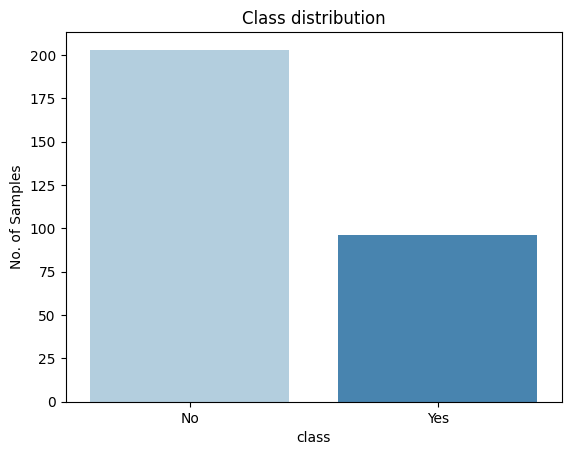

In [38]:
(unique, counts) = np.unique(data['DEATH_EVENT'], return_counts=True)
print(unique, counts)
sns.barplot(x=['No', 'Yes'], y=counts)
plt.xlabel('class')
plt.ylabel('No. of Samples')
plt.title('Class distribution')
plt.show()

Disini dapat dilihat bahwa terjadi ketidak seimbangan data, sehingga dierlukan oversampling

In [39]:
# Pilih metode oversampling
oversampler = sv.MulticlassOversampling(oversampler="Supervised_SMOTE", oversampler_params={'random_state':0})
X_oversampler, y_oversampler = oversampler.sample(X, y)

2023-12-02 13:00:07,030:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
INFO:smote_variants:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2023-12-02 13:00:07,049:INFO:MulticlassOversampling: Sampling minority class with label: 1
INFO:smote_variants:MulticlassOversampling: Sampling minority class with label: 1
2023-12-02 13:00:07,064:INFO:Supervised_SMOTE: Running sampling via ('Supervised_SMOTE', "{'proportion': 1.0, 'th_lower': 0.5, 'th_upper': 1.0, 'classifier': ('sklearn.ensemble', 'RandomForestClassifier', {'n_estimators': 50, 'n_jobs': 1, 'random_state': 5}), 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': 0, 'class_name': 'Supervised_SMOTE'}")
INFO:smote_variants:Supervised_SMOTE: Running sampling via ('Supervised_SMOTE', "{'proportion': 1.0, 'th_lower': 0.5, 'th_upper': 1.0, 'classi

In [40]:
print(X_oversampler.shape)
print(y_oversampler.shape)
print(pd.Series(y_oversampler).value_counts())

(406, 13)
(406,)
1    203
0    203
dtype: int64


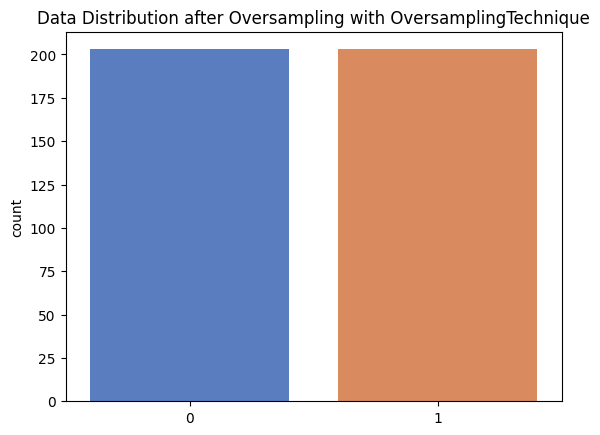

In [41]:
sns.countplot(x=y_oversampler, palette="muted")
plt.title('Data Distribution after Oversampling with OversamplingTechnique') # Menambahkan judul plot
plt.show()

Ketidakseimbangan data telah teratasi

### 6.6 Split dataset menjadi data uji dan data latih

In [42]:
# Bagi dataset menjadi data pelatihan (70%) dan pengujian (30%)
X_train, X_test,y_train,y_test = train_test_split(X_oversampler, y_oversampler, test_size=0.3, random_state=0)

Pembagian dataset perlu dilakukan untuk menilai kemampuan umum model dan mendeteksi overfitting. Pemilihan ratio didasarkan pada percobaan yang menunjukkan performa terbaik

In [43]:
# Melihat ukuran tiap data yang telah dibagi shape
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((284, 13), (284,), (122, 13), (122,))

Data saat ini telah terbagi menjadi data training dan data testing

## **7. Pendefinisian Model, Pelatihan Model, dan Evaluasi Model**

### 7.1 Pendefinisian Model

In [44]:
models={}

#  Logistic regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression']=LogisticRegression()


# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

from sklearn.ensemble import ExtraTreesClassifier
models['Extra Tree Classifier'] = ExtraTreesClassifier(n_estimators=1000, max_features=10, random_state=0)

# XGBoost
from xgboost import XGBClassifier
models['Xgboost'] = XGBClassifier()


Variabel models disini merupakan list digunakan untuk menyimpan beberapa model klasifikasi yaitu  Logistic regression, Decision Trees, Random Forest,Naive Bayes, K-Nearest Neighbors, dan XGBoost

### 7.2 Evaluasi Model

Classification Report : Logistic Regression
              precision    recall  f1-score   support

           0     0.8077    0.7925    0.8000        53
           1     0.8429    0.8551    0.8489        69

    accuracy                         0.8279       122
   macro avg     0.8253    0.8238    0.8245       122
weighted avg     0.8276    0.8279    0.8277       122



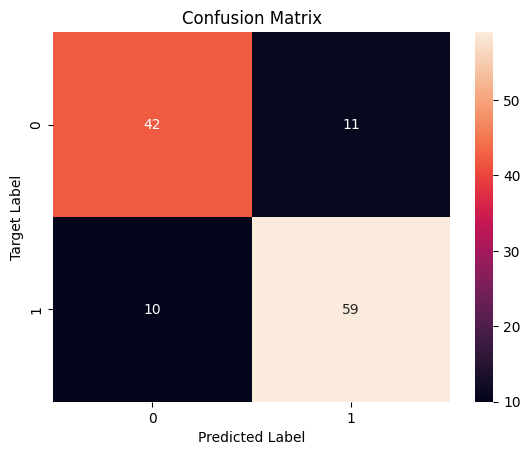

Classification Report : Decision Trees
              precision    recall  f1-score   support

           0     0.7321    0.7736    0.7523        53
           1     0.8182    0.7826    0.8000        69

    accuracy                         0.7787       122
   macro avg     0.7752    0.7781    0.7761       122
weighted avg     0.7808    0.7787    0.7793       122



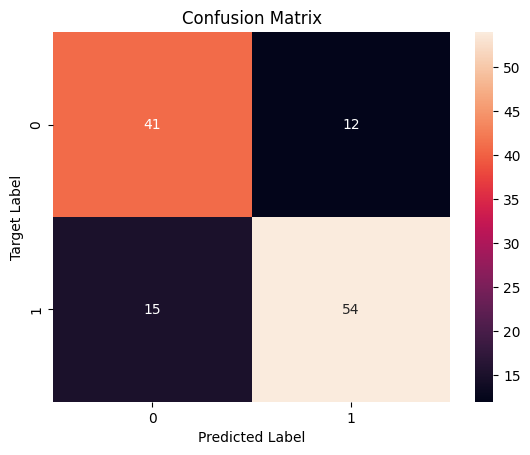

Classification Report : Random Forest
              precision    recall  f1-score   support

           0     0.8113    0.8113    0.8113        53
           1     0.8551    0.8551    0.8551        69

    accuracy                         0.8361       122
   macro avg     0.8332    0.8332    0.8332       122
weighted avg     0.8361    0.8361    0.8361       122



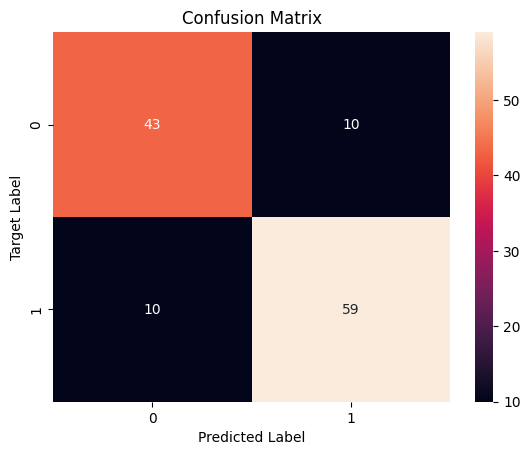

Classification Report : Naive Bayes
              precision    recall  f1-score   support

           0     0.8367    0.7736    0.8039        53
           1     0.8356    0.8841    0.8592        69

    accuracy                         0.8361       122
   macro avg     0.8362    0.8288    0.8315       122
weighted avg     0.8361    0.8361    0.8352       122



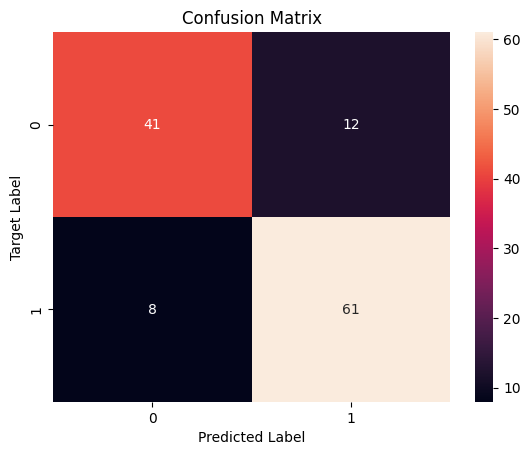

Classification Report : K-Nearest Neighbor
              precision    recall  f1-score   support

           0     0.7031    0.8491    0.7692        53
           1     0.8621    0.7246    0.7874        69

    accuracy                         0.7787       122
   macro avg     0.7826    0.7868    0.7783       122
weighted avg     0.7930    0.7787    0.7795       122



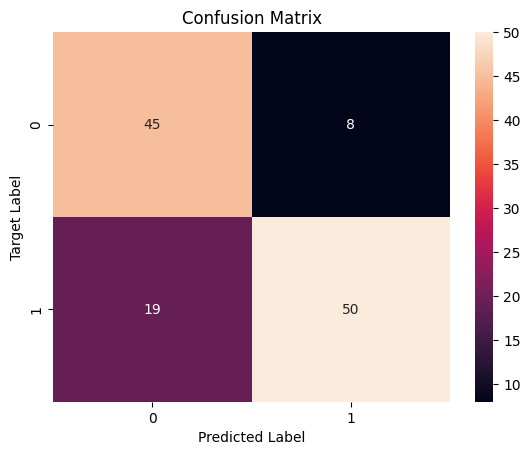

Classification Report : Extra Tree Classifier
              precision    recall  f1-score   support

           0     0.7963    0.8113    0.8037        53
           1     0.8529    0.8406    0.8467        69

    accuracy                         0.8279       122
   macro avg     0.8246    0.8260    0.8252       122
weighted avg     0.8283    0.8279    0.8280       122



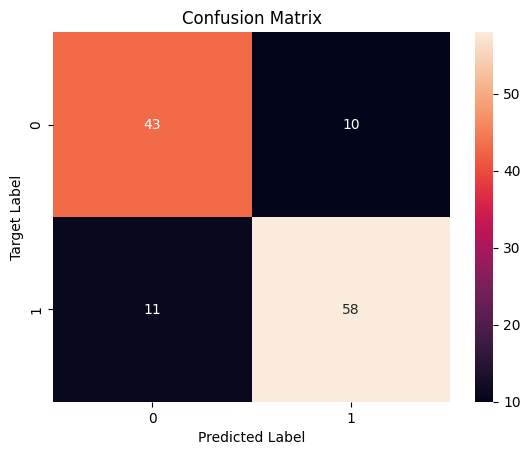

Classification Report : Xgboost
              precision    recall  f1-score   support

           0     0.8113    0.8113    0.8113        53
           1     0.8551    0.8551    0.8551        69

    accuracy                         0.8361       122
   macro avg     0.8332    0.8332    0.8332       122
weighted avg     0.8361    0.8361    0.8361       122



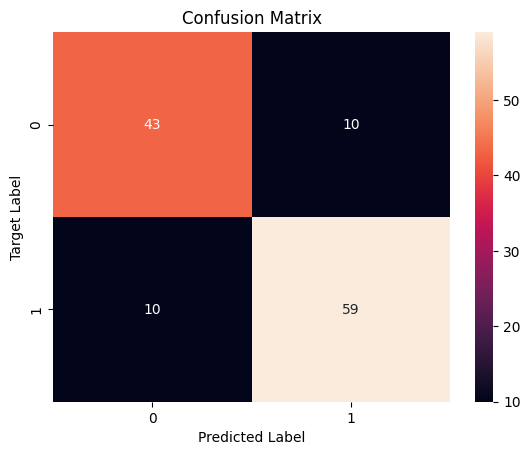

In [45]:
# evaluasi model
accuracy, precision, recall = {},{},{}

for key in models.keys():
  # Fit classifier model
  models[key].fit(X_train, y_train)

  # Prediction
  predictions = models[key].predict(X_test)

  # Menghitung Accuracy, Precision dan Recall Metrics
  accuracy[key] = accuracy_score(predictions, y_test)
  precision[key]=precision_score(predictions, y_test)
  recall[key] = recall_score(predictions, y_test)
  y_predict = models[key].predict(X_test)

  print('Classification Report :', key )
  print(classification_report(y_test,predictions, digits=4 ))

  sns.heatmap(confusion_matrix(y_test, predictions), fmt='', annot=True)

  plt.xlabel('Predicted Label')
  plt.ylabel('Target Label')
  plt.title('Confusion Matrix')
  plt.show()


In [46]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision']=precision.values()
df_model['Recall']=recall.values()

df_model.round(4)

,Accuracy,Precision,Recall
Logistic Regression,0.8279,0.8551,0.8429
Decision Trees,0.7787,0.7826,0.8182
Random Forest,0.8361,0.8551,0.8551
Naive Bayes,0.8361,0.8841,0.8356
K-Nearest Neighbor,0.7787,0.7246,0.8621
Extra Tree Classifier,0.8279,0.8406,0.8529
Xgboost,0.8361,0.8551,0.8551


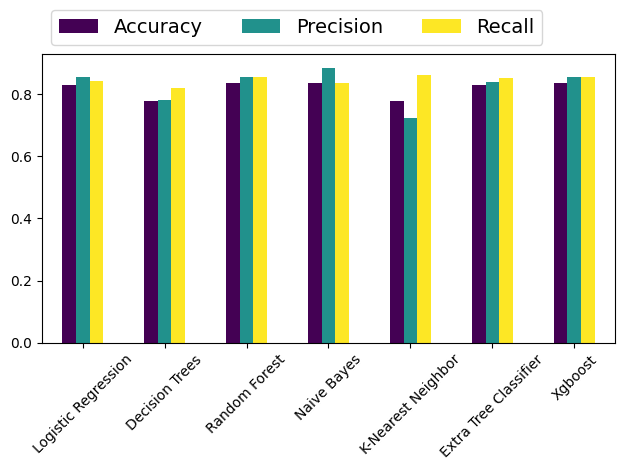

In [47]:
ax = df_model.plot.bar(rot=45,cmap='viridis')
ax.legend(ncol=len(models.keys()), bbox_to_anchor=(0,1), loc='lower left', prop={'size':14})
plt.tight_layout()

* **Akurasi (Accuracy):**

  Model Random Forest, Naive Bayes, dan XGBoost memiliki akurasi yang cukup tinggi, yaitu sekitar 83-84%. Ini menunjukkan bahwa model-model memberikan prediksi yang benar pada sebagian besar instance dalam dataset.

* **Presisi (Precision):**

  Model Naive Bayes memiliki presisi tertinggi, yaitu sekitar 88.41%. Presisi disini digunakan unutk mengukur sejauh mana prediksi positif yang dibuat oleh model adalah benar, dan nilai tinggi menunjukkan bahwa model tersebut lebih baik dalam menghindari prediksi positif yang salah.

* **Recall:**

  Model K-Nearest Neighbor memiliki recall tertinggi, yaitu sekitar 86.21%. Recall mengukur sejauh mana model dapat mengidentifikasi semua instance positif yang sebenarnya, dan nilai tinggi menunjukkan bahwa model tersebut dapat mengenali sebagian besar instance positif.
  

## **8. Model Ensemble**

### 8.1 Pendefinisian Model Ensemble

In [48]:
accuracy_ensemble, precision_ensemble, recall_ensemble={},{},{}
models_ensemble={}

Variabel ini digunakan untuk menyimpan nilai akurasi, presisi, recall dari beberapa model enemble

In [49]:
def evaluate(model, X_train, X_test, y_train, y_test,key):

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy_ensemble[key]= accuracy_score(predictions, y_test)
    precision_ensemble[key] = precision_score(predictions, y_test)
    recall_ensemble[key] = recall_score(predictions, y_test)

    auc = roc_auc_score(y_test, y_predict)
    print('Classification Report:')
    print(classification_report(y_test,predictions,digits=4))
    sns.heatmap(confusion_matrix(y_test,predictions),fmt='',annot=True)

    plt.title('Confusion Matrix')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

Function ini berguna untuk mempercepat proses evaluasi  model klasifikasi yang nantinya digunakan untuk penggabungan model.

### 8.2 Bagging Ensemble

Dari Evaluasi model sebelumnya model Random forest dan Xgboost menhasilkan nilai akurasi, presisi, dan recall yang sama, jadi kami memilih salah satu dari model tersebut yang akan kami jadikan base model/base estimator yaitu Xgboost.

Classification Report:
              precision    recall  f1-score   support

           0     0.8269    0.8113    0.8190        53
           1     0.8571    0.8696    0.8633        69

    accuracy                         0.8443       122
   macro avg     0.8420    0.8404    0.8412       122
weighted avg     0.8440    0.8443    0.8441       122



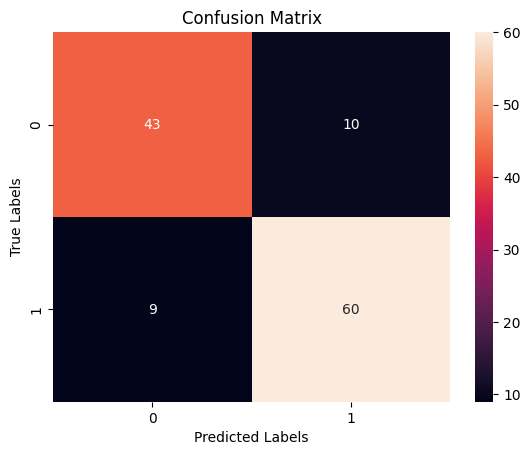

In [50]:
tree = XGBClassifier()
models_ensemble['Bagging'] = BaggingClassifier(base_estimator=tree, n_estimators=40, random_state=0)

evaluate(models_ensemble['Bagging'], X_train, X_test, y_train, y_test,'Bagging')

Disini dilakukan pengabungan antara model BaggingClassifier dan XGBClassifier dengan XGBClassifier sebagai base estimator.

### 8.3 AdaBoostClassifier


Model Ensemble lain selain Bagging adalah Adaboost

Classification Report:
              precision    recall  f1-score   support

           0     0.7895    0.8491    0.8182        53
           1     0.8769    0.8261    0.8507        69

    accuracy                         0.8361       122
   macro avg     0.8332    0.8376    0.8345       122
weighted avg     0.8389    0.8361    0.8366       122



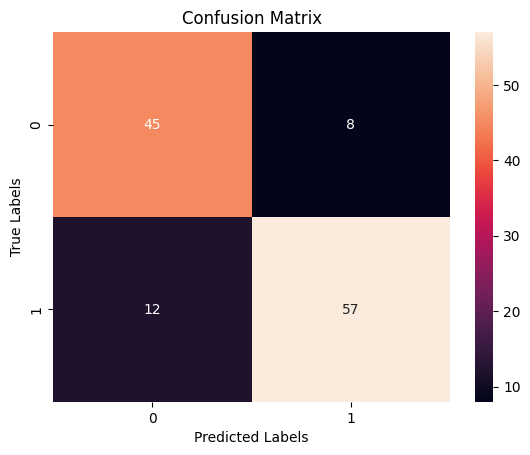

In [51]:
models_ensemble['AdaBoostClassifier'] = AdaBoostClassifier(n_estimators=10)
evaluate(models_ensemble['AdaBoostClassifier'], X_train, X_test, y_train, y_test,'AdaBoostClassifier')

n_estimators=10 disini menunjukkan bahwa model ensemble ini terdiri dari 10 estimator (pohon keputusan).

### 8.4 GradientBoosting

Model Boosting lain selain Adaboost adalah GradientBoosting, Dilakukan GradienBoosting karena  Gradient Boosting cenderung lebih adaptif dan dapat memodelkan hubungan yang lebih kompleks antara fitur dan target dibanding dengan AdaBoost. Gradient Boosting juga cenderung lebih lambat dalam pelatihannya karena setiap estimator memperbaiki kesalahan residual secara bertahap.

Classification Report:
              precision    recall  f1-score   support

           0     0.8000    0.8302    0.8148        53
           1     0.8657    0.8406    0.8529        69

    accuracy                         0.8361       122
   macro avg     0.8328    0.8354    0.8339       122
weighted avg     0.8371    0.8361    0.8364       122



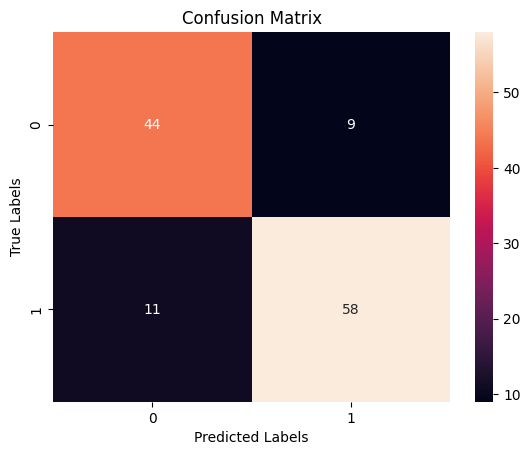

In [52]:
models_ensemble['Gradient Boost'] = GradientBoostingClassifier(n_estimators=100, random_state=0)
evaluate(models_ensemble['Gradient Boost'], X_train, X_test, y_train, y_test,'Gradient Boost')

### 8.5 Voting Ensemble

Voting ensemble bekerja dengan melatih beberapa model berbeda pada dataset yang sama dan mengambil hasil prediksi dari setiap model. Hasil prediksi ini kemudian digunakan untuk menghasilkan hasil akhir dengan menggunakan suara mayoritas dan rata-rata.

8.5.1 Soft Voting Ensemble

Classification Report:
              precision    recall  f1-score   support

           0     0.7925    0.7925    0.7925        53
           1     0.8406    0.8406    0.8406        69

    accuracy                         0.8197       122
   macro avg     0.8165    0.8165    0.8165       122
weighted avg     0.8197    0.8197    0.8197       122



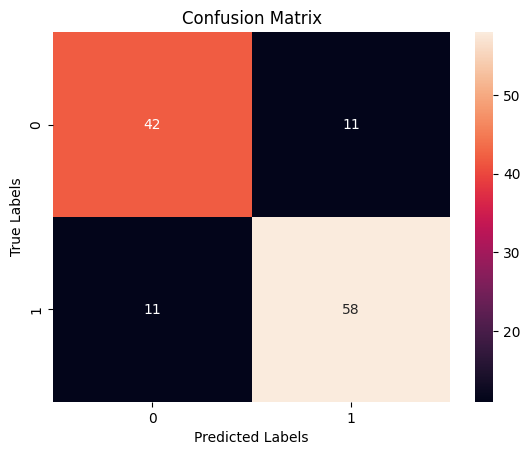

In [53]:
clf1 = ExtraTreesClassifier()
clf2 = RandomForestClassifier()
clf3 = XGBClassifier()
clf4 = DecisionTreeClassifier()
models_ensemble['Soft Voting'] = VotingClassifier(estimators=[('ExTrees', clf1), ('Random Forest', clf2), ('XGB', clf3),('Decision Tree',clf4)], voting='soft')
evaluate(models_ensemble['Soft Voting'],X_train, X_test, y_train, y_test,'Soft Voting')


8.5.2 Hard Voting Ensemble

Classification Report:
              precision    recall  f1-score   support

           0     0.7818    0.8113    0.7963        53
           1     0.8507    0.8261    0.8382        69

    accuracy                         0.8197       122
   macro avg     0.8163    0.8187    0.8173       122
weighted avg     0.8208    0.8197    0.8200       122



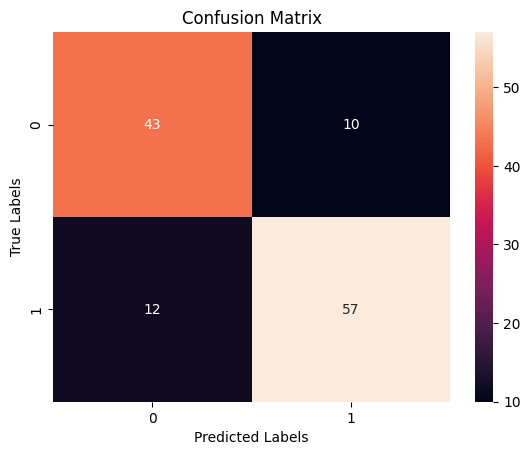

In [54]:
clf1 = ExtraTreesClassifier()
clf2 = RandomForestClassifier()
clf3 = XGBClassifier()
clf4 = DecisionTreeClassifier()
models_ensemble['Hard Voting'] = VotingClassifier(estimators=[('ExTrees', clf1), ('Random Forest', clf2), ('XGB', clf3),('Decision Tree',clf4)], voting='hard')
evaluate(models_ensemble['Hard Voting'],X_train, X_test, y_train, y_test,'Hard Voting')


Voting Ensemble disini terdapat 2 macam, yaitu Soft Voting Ensemble dan Hard Voting Ensemble. Pada hard voting,  prediksi akhir ditentukan berdasarkan mayoritas suara. Sedangkan pada soft voting, prediksi akhir didasarkan pada rata-rata dari probabilitas .

### 8.6 StackingClassifier

In [55]:
models_ensemble['Stacked'] = StackingClassifier(estimators=[('m1', models['Xgboost']),
 ('m2', models['Extra Tree Classifier']), ('m3', models['Random Forest']),('m4',models['Decision Trees'])], final_estimator=LinearSVC())

Classification Report:
              precision    recall  f1-score   support

           0     0.8269    0.8113    0.8190        53
           1     0.8571    0.8696    0.8633        69

    accuracy                         0.8443       122
   macro avg     0.8420    0.8404    0.8412       122
weighted avg     0.8440    0.8443    0.8441       122



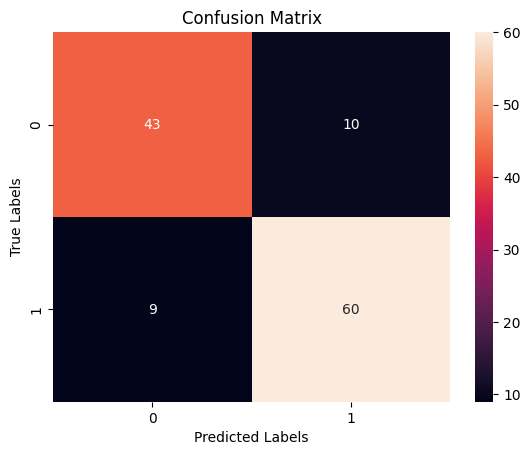

In [56]:
evaluate(models_ensemble['Stacked'], X_train, X_test, y_train, y_test,'Stacked')


Stacking adalah metode ensemble learning yang menggabungkan beberapa model menjadi satu. Stacking disini memiliki 2 level. Level 1 adalah model dengan inisialisasi nama m1-m4 (Xgboost, Extra Tree Classifier, Random Forest, Decision Trees) dan level 2 / meta-model menggunakan linear SVC

In [57]:
df_model_ensemble = pd.DataFrame(index=models_ensemble.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model_ensemble['Accuracy'] = accuracy_ensemble.values()
df_model_ensemble['Precision']= precision_ensemble.values()
df_model_ensemble['Recall'] = recall_ensemble.values()

df_model_ensemble.round(4)

,Accuracy,Precision,Recall
Bagging,0.8443,0.8696,0.8571
AdaBoostClassifier,0.8361,0.8261,0.8769
Gradient Boost,0.8361,0.8406,0.8657
Soft Voting,0.8197,0.8406,0.8406
Hard Voting,0.8197,0.8261,0.8507
Stacked,0.8443,0.8696,0.8571


Dalam ringkasan tabel diatas, dapat dilihat bahwa model ensembel yang memiliki akurasi paling besar dengan presisi dan recall yang cukup besar pula adalah pada model Bagging. sehingga dapat disimpulkan bahwa data ini cocok dengan model bagging Ensemble

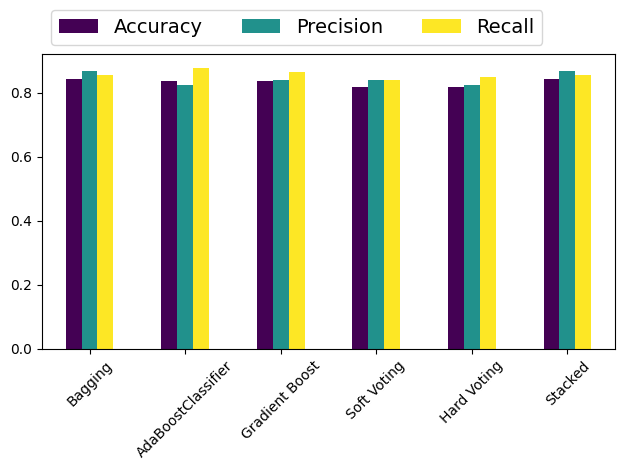

In [58]:
ax  = df_model_ensemble.plot.bar(rot=45, cmap='viridis')
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

## **9. Model Inference**

In [59]:
# Membuat data untuk melakukan model inference
model_inference = {
    'age': [65, 40, 78],
    'anaemia': [1, 0, 0],
    'creatinine_phosphokinase': [115, 89, 572],
    'diabetes': [0, 1, 0],
    'ejection_fraction': [20, 30, 40],
    'high_blood_pressure': [1, 0, 1],
    'platelets': [245000.00, 178000.00, 193000.00],
    'serum_creatinine': [1.8, 2.2, 1.7],
    'serum_sodium': [129, 130, 133],
    'sex': [1, 1, 0],
    'smoking': [1, 1, 0],
    'time': [5, 7, 9],
    'recovery_potential':[0.67,0.30,0.82]

}

# Membuat dataframe dari model inference
model_inference = pd.DataFrame(model_inference)

# Hitung kolom recovery_potential
model_inference['recovery_potential'] = calculate_recovery_potential(model_inference)

# Tampilkan DataFrame hasil
model_inference

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,recovery_potential
0,65,1,115,0,20,1,245000.0,1.8,129,1,1,5,0.306333
1,40,0,89,1,30,0,178000.0,2.2,130,1,1,7,0.740326
2,78,0,572,0,40,1,193000.0,1.7,133,0,0,9,0.508713


In [60]:
models_ensemble['Bagging'].fit(X_train, y_train)

# Melakukan prediksi
predictions = models_ensemble['Bagging'].predict(model_inference)
predictions

array([0, 0, 0])

Penggunaan model bagging ensemble karena memiliki akurasi terbaik dibandingkan model lain yang dibangun. Hasil prediksi menggunakan model yang dibangun dengan model inference adalah 0, 0, 0.

## **10. Kesimpulan**

Penelitian yang dilakukan menggunakan model **Random Forest**, **Gradient Boosting Classifier**, dan **Extra Trees Classifier** melalui beberapa proses untu memastikan model yang dibuat memiliki performa baik dengan data yang valid dan relevan. Proses-proses tersebut, yaitu:
1.   Data Loading
2.   Data Cleaning
3.   Explore Data
4.   Preprocessing Data
5.   Pemodelan dan Evaluasi
6.   Model Improvement
7.   Model Inference

**Descriptive Statistik pada Fitur-fitur yang ada pada data dapat disimpulkan sebagai berikut:**
1. Usia (Age):
  * Rata-rata usia pasien adalah sekitar 60.84 tahun.
  * Variabilitas usia relatif rendah, dengan standar deviasi sekitar 11.90.
2. Creatinine Phosphokinase:
  * Rata-rata tingkat creatinine phosphokinase (CPK) adalah sekitar 581.84.
3. Ejection Fraction:
  * Rata-rata ejection fraction adalah sekitar 38.08%.
  * Rentang ejection fraction dalam dataset ini adalah 66%.
4. Platelets:
  * Rata-rata jumlah platelet adalah sekitar 263358.
5. Serum Creatinine:
  * Rata-rata serum creatinine adalah sekitar 1.39.
6. Serum Sodium:
  * Rata-rata serum sodium adalah sekitar 136.63.
7. Waktu (Time):
  * Rata-rata waktu pengamatan pasien dalam dataset adalah sekitar 130.26.
8. Potensi Pemulihan (Recovery Potential):
  * Rata-rata potensi pemulihan adalah sekitar 0.64.


**Hasil Evaluasi individual Model:**
1. Logistic Regression:
  * Akurasi: 82.79%
  * Presisi: 85.51%
  * Recall: 84.29%
  * Logistic Regression memberikan keseimbangan yang baik antara presisi dan recall.
2. Decision Trees:
  * Akurasi: 77.87%
  * Presisi: 78.26%
  * Recall: 81.82%
  * Decision Trees memiliki akurasi yang lebih rendah, namun recall yang cukup tinggi.
3. Random Forest:
  * Akurasi: 83.61%
  * Presisi: 85.51%
  * Recall: 85.51%
  * Random Forest memberikan keseimbangan yang baik dan meningkatkan akurasi dibandingkan dengan Decision Trees.
4. Naive Bayes:
  * Akurasi: 83.61%
  * Presisi: 88.41%
  * Recall: 83.56%
  * Naive Bayes memberikan presisi yang tinggi dan keseimbangan antara akurasi, presisi, dan recall.
5. K-Nearest Neighbor:
  * Akurasi: 77.87%
  *  Presisi: 72.46%
  * Recall: 86.21%
  * K-Nearest Neighbor memiliki recall yang tinggi, tetapi akurasi dan presisi yang lebih rendah.
6. Extra Tree Classifier:
  * Akurasi: 82.79%
  * Presisi: 84.06%
  * Recall: 85.29%
  * Extra Tree Classifier memberikan keseimbangan yang baik, mirip dengan Random Forest.
7. XGBoost:
  * Akurasi: 83.61%
  * Presisi: 85.51%
  * Recall: 85.51%
  * XGBoost memberikan performa yang baik dan konsisten dengan Random Forest.



  **Hasil Model Ensemble:**
* Bagging memiliki akurasi tertinggi (0.8443), dengan precision dan recall yang cukup baik.
* AdaBoostClassifier dan Gradient Boost memiliki kinerja yang sebanding dengan akurasi yang tinggi, dan AdaBoostClassifier memiliki recall tertinggi (0.8769).
* Soft Voting dan Stacked memberikan performa yang baik secara keseluruhan dengan akurasi di sekitar 0.83.
* Hard Voting menunjukkan kinerja yang sedikit lebih rendah dibandingkan model-model lainnya

Sehingga dapat disimpulkan bahwa pada data ini model yang cocok untuk memprediksi  keselamatan pasien dari penyakit jantung adalah model ensembel dengan metode Bagging dengan XGBoost sebagai base modelnya.


## **11. Deployment**
[Web App Heart Fail](https://ensemble-model-prediksi-pasien-penyakit-jantung.streamlit.app/)